<a href="https://colab.research.google.com/github/ulugeyik/toucanpi/blob/main/toucanpiISSdata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#26/05/2022 Received AstroPi data from ISS. 
#This notebook is for carrying out general analysis of the data, getting an overview
# ToucanPi Team.

In [ ]:
#the following part is needed in order to upload a data file.
#it requires that I turn on third part cookies
#solution: https://github.com/googlecolab/colabtools/issues/17
#once it has been uploaded I can comment it out.
#info: https://medium.com/towards-data-science/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#from google.colab import files
#uploaded = files.upload()


In [ ]:
#for loading data on google collaboratory
import pandas as pd
import io
mydata = pd.read_csv(io.BytesIO(uploaded['toucandata_20220513_201103.csv']),parse_dates={ 'newdate': ['Date/Time'] })


In [47]:
#for maths,plots and other things
#if using pylot etc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#if using plotly
import plotly.express as px
import plotly.graph_objs as go
#general
import numpy as np
import math

In [ ]:
#Note: to make a .gif of the images
#ffmpeg  -framerate 10 -pattern_type glob -i '*.jpg' -r 15 -vf scale=512:-1 out.gif


#plot acceleration, acceleration intensity of the axis in Gs.
#this is using pyplot , matplotlib, limited interaction capabilities, specially in Junyper/Collaboratory
#plt.figure()
#plt.plot(mydata.newdate,np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ)))
#locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
#plt.gca().xaxis.set_major_locator(locator)
#plt.gca().xaxis.set_major_formatter(formatter)
#plt.show()


In [ ]:
#one option kept for reference
# #plot acceleration, acceleration intensity of the axis in Gs.
# #this is using plotly, increased interaction capabilities, specially in Junyper/Collaboratory
# # examples: https://plotly.com/python/line-and-scatter/
# #labels: https://plotly.com/python/figure-labels/
# #hover stuff https://plotly.com/python/hover-text-and-formatting/
# #note: plotly express, pxline etc is more capable in terms of hover stuff but you cannot add individual objects
# #updates: https://plotly.com/python/creating-and-updating-figures/

# fig= go.Figure(px.line(x=mydata.newdate,y=np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ)),hover_data=[mydata.Lat,mydata.Long],markers=True,labels={
#                      "x": "Date/time",
#                      "y": "Acceleration [G]",
#                      "hover_data_0": "Latitude (o)",
#                      "hover_data_1": "Longitude (o)"
#                                       }))
# fig.add_trace(go.Scatter(x=mydata.newdate,y=mydata.AccX,mode='lines+markers',name="Acceleration X"))
# fig.add_trace(go.Scatter(x=mydata.newdate,y=mydata.AccY,mode='lines+markers',name="Acceleration Y"))
# fig.add_trace(go.Scatter(x=mydata.newdate,y=mydata.AccZ,mode='lines+markers',name="Acceleration Z"))
# fig.update_layout(title='Acceleration over time',showlegend=True,hovermode='x unified')
# fig.show()



In [95]:
#Hack for labels: https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
newnames = {'AccX':'Acceleration X', 'AccY': 'Acceleration Y', 'AccZ': 'Acceleration Z','wide_variable_3': 'Acceleration Total','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(mydata,x='newdate',y=['AccX','AccY','AccZ',np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ))],hover_data=['Lat','Long'],markers=True))
fig.update_layout(title='Acceleration over time',showlegend=True,yaxis_title="Acceleration [G]",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

In [96]:
newnames = {'MagnetX':'Magnetic F. X', 'MagnetY':'Magnetic F. Y','MagnetZ':'Magnetic F. Z','wide_variable_3': 'Magnetic F Total','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(mydata,x='newdate',y=['MagnetX','MagnetY','MagnetZ',np.sqrt(np.square(mydata.MagnetX)+np.square(mydata.MagnetY)+np.square(mydata.MagnetZ))],hover_data=['Lat','Long'],markers=True))
fig.update_layout(title='Magnetic Field over time',showlegend=True,yaxis_title="Magnetic Field [$\mu$T]",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()
# #plot magnetic field, microTesla's
# plt.figure()
# plt.plot(mydata.newdate,np.sqrt(np.square(mydata.MagnetX)+np.square(mydata.MagnetY)+np.square(mydata.MagnetZ)))
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# plt.gca().xaxis.set_major_locator(locator)
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.show()


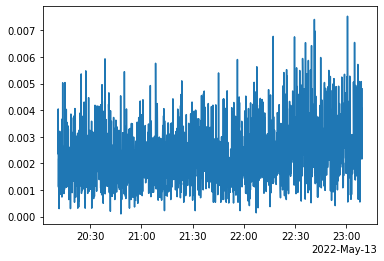

In [10]:

#plot gyro data, radians/second ("rotational intensity")
plt.figure()
plt.plot(mydata.newdate,np.sqrt(np.square(mydata.GyroX)+np.square(mydata.GyroY)+np.square(mydata.GyroZ)))
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



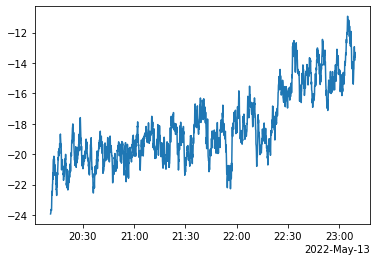

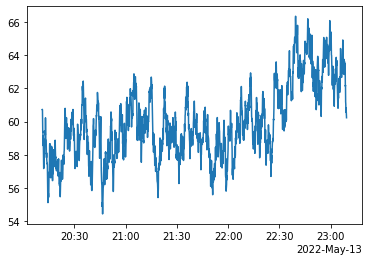

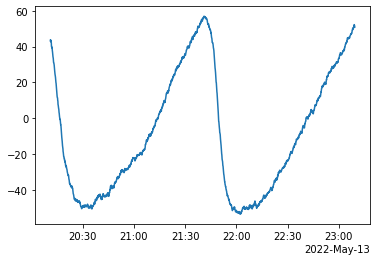

In [12]:
#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientPitch*180.0 / math.pi)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()


#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientRoll*180.0 / math.pi)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientYaw*180.0 / math.pi)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()



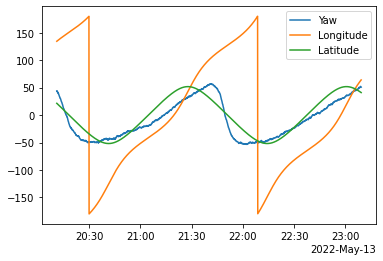

In [13]:

#yaw contains the most interesting information.
#plot orientation data
plt.figure()
plt.plot(mydata.newdate,mydata.OrientYaw*180.0 / math.pi, label='Yaw')
plt.plot(mydata.newdate,mydata.Long,label='Longitude')
plt.plot(mydata.newdate,mydata.Lat,label='Latitude')
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().legend()
plt.show()


In [14]:

#show location, possibly wrong:
#to plot things on a world map, interactive, may be incorrect.
fig = px.scatter_geo(mydata,lat=mydata.Lat,lon=mydata.Long)
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()
